num_trees: 0
num_trees: 10
num_trees: 20
num_trees: 30
num_trees: 40
num_trees: 50
num_trees: 60
num_trees: 70
num_trees: 80
num_trees: 90
num_trees: 100
num_trees: 110
num_trees: 120
num_trees: 130
num_trees: 140
num_trees: 150
num_trees: 160
num_trees: 170
num_trees: 180
num_trees: 190
num_trees: 200
num_trees: 210
num_trees: 220
num_trees: 230
num_trees: 240
num_trees: 250
num_trees: 260
num_trees: 270
num_trees: 280
num_trees: 290


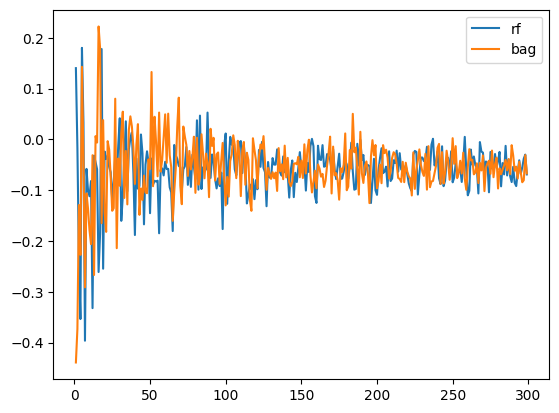

In [1]:
from __future__ import print_function, division
from builtins import range, input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier, BaggingClassifier
from util import BaggedTreeRegressor, BaggedTreeClassifier

# make simple regression data
N = 15
D = 100
X = (np.random.random((N, D)) - 0.5)*10
Y = X.sum(axis=1)**2 + 0.5*np.random.randn(N)
Ntrain = N//2
Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]
Xtest = X[Ntrain:]
Ytest = Y[Ntrain:]

# from rf_classification import get_data
# X, Y = get_data()
# Ntrain = int(0.8*len(X))
# Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
# Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

# from rf_regression import get_data
# Xtrain, Ytrain, Xtest, Ytest = get_data()

T = 300
test_error_rf = np.empty(T)
test_error_bag = np.empty(T)
for num_trees in range(T):
  if num_trees == 0:
    test_error_rf[num_trees] = None
    test_error_bag[num_trees] = None
  else:
    rf = RandomForestRegressor(n_estimators=num_trees)
    # rf = RandomForestClassifier(n_estimators=num_trees)
    rf.fit(Xtrain, Ytrain)
    test_error_rf[num_trees] = rf.score(Xtest, Ytest)

    bg = BaggedTreeRegressor(n_estimators=num_trees)
    # bg = BaggedTreeClassifier(n_estimators=num_trees)
    bg.fit(Xtrain, Ytrain)
    test_error_bag[num_trees] = bg.score(Xtest, Ytest)

  if num_trees % 10 == 0:
    print("num_trees:", num_trees)

plt.plot(test_error_rf, label='rf')
plt.plot(test_error_bag, label='bag')
plt.legend()
plt.show()
